In [1]:
import pandas as pd
import numpy as np
import random
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [2]:
!wget 'https://docs.google.com/uc?export=download&id=1ekeDxBR6haGLExqWL8tBiiJa7psqg4mP&confirm=t' -O metadata.csv

--2025-09-02 08:47:35--  https://docs.google.com/uc?export=download&id=1ekeDxBR6haGLExqWL8tBiiJa7psqg4mP&confirm=t
Resolving docs.google.com (docs.google.com)... 192.178.219.102, 192.178.219.100, 192.178.219.138, ...
Connecting to docs.google.com (docs.google.com)|192.178.219.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1ekeDxBR6haGLExqWL8tBiiJa7psqg4mP&export=download [following]
--2025-09-02 08:47:35--  https://drive.usercontent.google.com/download?id=1ekeDxBR6haGLExqWL8tBiiJa7psqg4mP&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 192.178.219.132, 2607:f8b0:400c:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|192.178.219.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 655218 (640K) [application/octet-stream]
Saving to: ‘metadata.csv’

metadata.csv        100%[===================>] 639.86K  

In [3]:
df = pd.read_csv('metadata.csv')

In [4]:
df.head()

,FileName,Font,Text
0,file_1.png,CourierNew,Sediment
1,file_2.png,Arial,Guest
2,file_3.png,CenturyGothic,Socket
3,file_4.png,Verdana,Onset
4,file_5.png,Candara,Driver


1. Quantas amostras existem por fonte? Há equilíbrio entre as 20 classes?

In [5]:
# Agrupar por “Font” e contar quantas imagens há em cada classe
contagem_por_fonte = df['Font'].value_counts().sort_index()

print("Quantidade de amostras por fonte:")
print(contagem_por_fonte)

# Checar mínimo e máximo para ver se todas as fontes têm ~1000 imagens
min_qtd = contagem_por_fonte.min()
max_qtd = contagem_por_fonte.max()
print(f"\nMínimo por fonte: {min_qtd} | Máximo por fonte: {max_qtd}")

if min_qtd == max_qtd:
    print("Todas as 20 fontes estão balanceadas.")
else:
    print("Há desequilíbrio no número de amostras entre as fontes.")


Quantidade de amostras por fonte:
Font
Arial              1000
Bookman            1000
Calibri            1000
Candara            1000
CenturyGothic      1000
ComicSansMS        1000
CourierNew         1000
FranclinGothic     1000
Garamond           1000
Georgia            1000
Helvetica          1000
Lobster            1000
LucidaSans         1000
MS_Sans_Serif      1000
MonotypeCorsiva    1000
Palatino           1000
SegoeUI            1000
TimesNewRoman      1000
TrebuchetMS        1000
Verdana            1000
Name: count, dtype: int64

Mínimo por fonte: 1000 | Máximo por fonte: 1000
Todas as 20 fontes estão balanceadas.


2. Qual a distribuição de palavras com 3–8 letras?

In [6]:
# Criar coluna “word_length” com tamanho da palavra (texto)
df['word_length'] = df['Text'].str.len()

# Filtrar só palavras entre 3 e 8 caracteres
filtro_3_8 = df[(df['word_length'] >= 3) & (df['word_length'] <= 8)]

# Contar quantas amostras para cada tamanho de palavra (3 a 8)
dist_tamanhos = filtro_3_8['word_length'].value_counts().sort_index()

print(" Distribuição de palavras (3 a 8 letras):")
for tamanho, qtd in dist_tamanhos.items():
    print(f"  - {tamanho} letras: {qtd} amostras")

# Calcular porcentagem de cada tamanho
total_3_8 = dist_tamanhos.sum()
print("\n Porcentagem de cada tamanho:")
for tamanho, qtd in dist_tamanhos.items():
    perc = qtd / total_3_8 * 100
    print(f"  - {tamanho} letras: {perc:.2f}%")

 Distribuição de palavras (3 a 8 letras):
  - 3.0 letras: 1211 amostras
  - 4.0 letras: 2933 amostras
  - 5.0 letras: 4127 amostras
  - 6.0 letras: 4256 amostras
  - 7.0 letras: 3996 amostras
  - 8.0 letras: 3472 amostras

 Porcentagem de cada tamanho:
  - 3.0 letras: 6.06%
  - 4.0 letras: 14.67%
  - 5.0 letras: 20.64%
  - 6.0 letras: 21.29%
  - 7.0 letras: 19.98%
  - 8.0 letras: 17.36%


3. Quantas das 6.569 palavras únicas aparecem em múltiplas fontes?

In [7]:
# Para cada palavra (“Text”), contar quantas fontes (“Font”) distintas existem
fontes_por_palavra = df.groupby('Text')['Font'].nunique()

# Contar quantas palavras aparecem em mais de uma fonte
palavras_multiplas_fontes = (fontes_por_palavra > 1).sum()

print(f" Total de palavras únicas: {df['Text'].nunique()}")
print(f" Nº de palavras que aparecem em ≥2 fontes: {palavras_multiplas_fontes}")

 Total de palavras únicas: 6568
 Nº de palavras que aparecem em ≥2 fontes: 5540


In [8]:
# Calcular quantas fontes cada palavra ocupa (fontes_por_palavra)
fontes_por_palavra = df.groupby('Text')['Font'].nunique()

# Filtrar apenas as palavras que têm count > 1
palavras_repetidas = fontes_por_palavra[fontes_por_palavra > 1].index

# exemplo de 10 palavras repetidas
exemplos = list(palavras_repetidas[:10])
print("Algumas palavras que aparecem em ≥ 2 fontes:\n", exemplos)

# Ver cada fonte que cada palavra se repete
for w in exemplos:
    fontes = df[df['Text'] == w]['Font'].unique()
    print(f"'{w}' aparece nas fontes: {list(fontes)}")


Algumas palavras que aparecem em ≥ 2 fontes:
 ['Aaron', 'Abbey', 'Abbot', 'Abbott', 'Abc', 'Abdul', 'Abel', 'Ability', 'Abode', 'Abortion']
'Aaron' aparece nas fontes: ['Helvetica', 'TrebuchetMS']
'Abbey' aparece nas fontes: ['Bookman', 'Garamond', 'Verdana', 'MonotypeCorsiva']
'Abbot' aparece nas fontes: ['Candara', 'SegoeUI', 'Palatino']
'Abbott' aparece nas fontes: ['Candara', 'TrebuchetMS']
'Abc' aparece nas fontes: ['MS_Sans_Serif', 'FranclinGothic', 'ComicSansMS', 'Arial']
'Abdul' aparece nas fontes: ['ComicSansMS', 'CenturyGothic', 'FranclinGothic', 'Georgia', 'Helvetica']
'Abel' aparece nas fontes: ['Georgia', 'MS_Sans_Serif', 'TimesNewRoman', 'Palatino']
'Ability' aparece nas fontes: ['Helvetica', 'Lobster', 'Calibri']
'Abode' aparece nas fontes: ['Helvetica', 'TimesNewRoman', 'ComicSansMS', 'FranclinGothic', 'SegoeUI', 'Candara']
'Abortion' aparece nas fontes: ['Garamond', 'CenturyGothic', 'Helvetica']


4. Quantas palavras únicas aparecem em apenas uma fonte? (indicador de vazamento)

In [9]:
palavras_exclusivas = (fontes_por_palavra == 1).sum()

print(f"🔒 Palavras únicas em apenas uma fonte: {palavras_exclusivas}")

🔒 Palavras únicas em apenas uma fonte: 1028


5. Qual a frequência de palavras repetidas? Há exatamente 1000 palavras distintas por fonte?

In [10]:
# Agrupar por fonte e contar quantas palavras distintas existem
palavras_por_fonte = df.groupby('Font')['Text'].nunique().sort_index()

print(" Nº de palavras únicas por fonte:")
print(palavras_por_fonte)

# Checar se todas têm exatamente 1000
if (palavras_por_fonte == 1000).all():
    print(" Todas as fontes têm exatamente 1000 palavras distintas.")
else:
    print(" Algumas fontes têm menos de 1000 palavras únicas (repetição).")


 Nº de palavras únicas por fonte:
Font
Arial              1000
Bookman            1000
Calibri            1000
Candara            1000
CenturyGothic      1000
ComicSansMS         999
CourierNew         1000
FranclinGothic     1000
Garamond           1000
Georgia            1000
Helvetica           999
Lobster            1000
LucidaSans         1000
MS_Sans_Serif       999
MonotypeCorsiva    1000
Palatino            999
SegoeUI             999
TimesNewRoman      1000
TrebuchetMS        1000
Verdana            1000
Name: Text, dtype: int64
 Algumas fontes têm menos de 1000 palavras únicas (repetição).


6. Existem imagens corrompidas ou fora do padrão 200x50? Como validar a integridade?

In [11]:
file_id = "13X6sdfevLqkd8fngx09QQRqAi3QI44Sm"
file_name = "imagens.zip"
!pip install -q gdown
import gdown
gdown.download(f"https://drive.google.com/uc?id={file_id}", file_name, quiet=False)

# Extrai as imagens para a pasta 'images'
!unzip -q {file_name} -d images

Downloading...
From (original): https://drive.google.com/uc?id=13X6sdfevLqkd8fngx09QQRqAi3QI44Sm
From (redirected): https://drive.google.com/uc?id=13X6sdfevLqkd8fngx09QQRqAi3QI44Sm&confirm=t&uuid=5a8db0e6-a146-428d-832f-801d208b213f
To: /content/imagens.zip
100%|██████████| 40.8M/40.8M [00:00<00:00, 48.7MB/s]


In [12]:
# Caminho da pasta com imagens
caminho_imagens = "images/imagens"

# Verificar dimensões de cada imagem
dimensoes_erradas = []

for i, row in df.iterrows():
    img_path = os.path.join(caminho_imagens, row['FileName'])
    try:
        with Image.open(img_path) as img:
            if img.size != (200, 50):
                dimensoes_erradas.append((row['FileName'], img.size))
    except Exception as e:
        print(f" Erro ao abrir {row['FileName']}: {e}")

# Resultado
if not dimensoes_erradas:
    print(" Todas as imagens têm dimensão 200x50 e estão íntegras!")
else:
    print(f" {len(dimensoes_erradas)} imagens com dimensões incorretas:")
    for arq, tamanho in dimensoes_erradas[:10]:
        print(f"  - {arq}: {tamanho}")

 Todas as imagens têm dimensão 200x50 e estão íntegras!


7. Artefatos de renderização: há desfoques ou serrilhados?

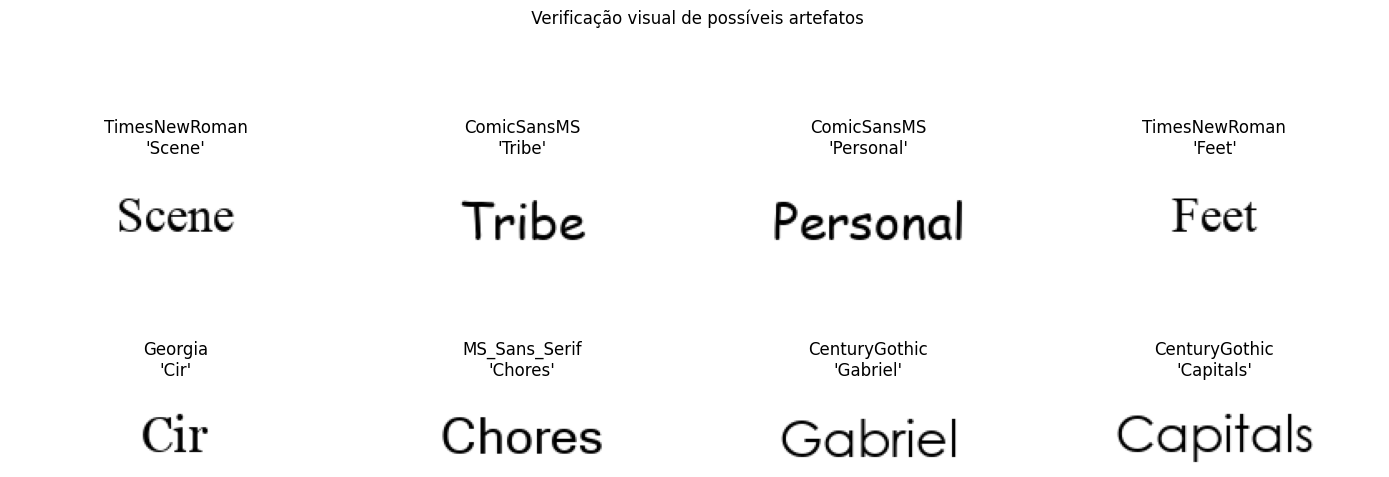

In [13]:
# Visualizar algumas imagens aleatórias
amostras = df.sample(8, random_state=42)

fig, axs = plt.subplots(2, 4, figsize=(14, 6))
axs = axs.flatten()

for i, (_, row) in enumerate(amostras.iterrows()):
    img_path = os.path.join(caminho_imagens, row['FileName'])
    try:
        img = mpimg.imread(img_path)
        axs[i].imshow(img, cmap='gray')
        axs[i].set_title(f"{row['Font']}\n'{row['Text']}'")
        axs[i].axis('off')
    except:
        axs[i].set_visible(False)

plt.suptitle(" Verificação visual de possíveis artefatos")
plt.tight_layout()
plt.show()


8. Palavras com 3 letras: têm informação visual suficiente?

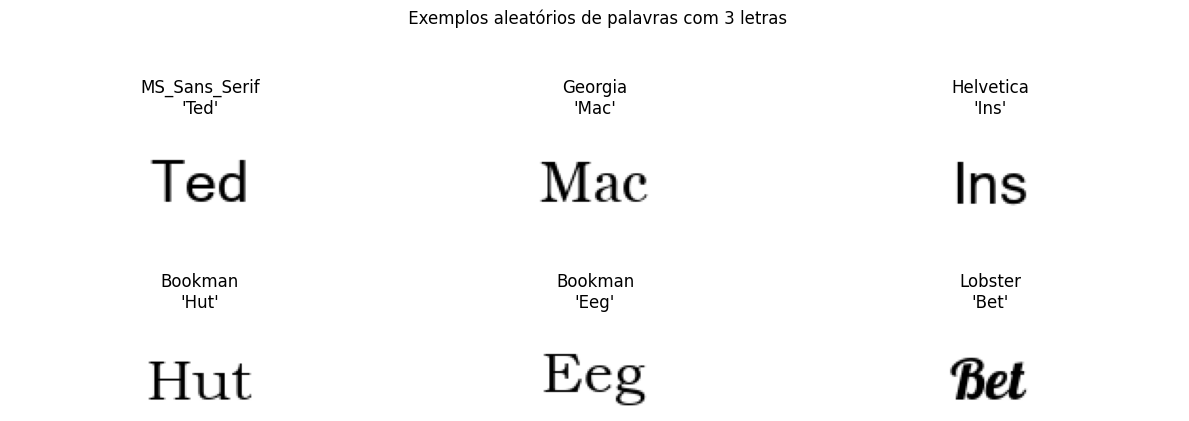

In [14]:
# Filtrar palavras com exatamente 3 letras
palavras_3 = df[df['word_length'] == 3]

# Selecionar 6 amostras aleatórias dentre essas palavras de 3 letras
amostras_3_letras = palavras_3.sample(6, random_state=42).reset_index(drop=True)

# Configurar o grid 2x3
fig, axs = plt.subplots(2, 3, figsize=(12, 5))
axs = axs.flatten()

for i, row in amostras_3_letras.iterrows():
    img_path = os.path.join(caminho_imagens, row['FileName'])
    try:
        img = mpimg.imread(img_path)
        axs[i].imshow(img, cmap='gray')
        axs[i].set_title(f"{row['Font']}\n'{row['Text']}'")
        axs[i].axis('off')
    except Exception as e:
        axs[i].set_visible(False)
        print(f" Erro ao abrir {row['FileName']}: {e}")

plt.suptitle(" Exemplos aleatórios de palavras com 3 letras")
plt.tight_layout()
plt.show()


9. Palavras com letras raras (j, q, z): frequência e impacto

In [15]:
# Extrair palavras únicas, descartando NaN
palavras_unicas = df['Text'].dropna().unique()

# Contar quantas contêm 'j', 'q' ou 'z'
def tem_letra_rara(palavra):
    # Garante que ‘palavra’ seja string
    if not isinstance(palavra, str):
        return False
    return any(char in palavra.lower() for char in ['j', 'q', 'z'])

mask_raras = [tem_letra_rara(w) for w in palavras_unicas]
palavras_raras = palavras_unicas[np.array(mask_raras)]

# Estatísticas sobre palavras únicas
total_unicas = len(palavras_unicas)
total_raras = len(palavras_raras)
perc_raras = total_raras / total_unicas * 100

print(f" Total de palavras únicas (não nulas): {total_unicas}")
print(f" Palavras com pelo menos uma letra rara (j, q, z): {total_raras} ({perc_raras:.2f}%)")

# Frequência em todo o dataset (considerando repetições)
df['is_rare'] = df['Text'].apply(lambda x: tem_letra_rara(x) if isinstance(x, str) else False)
freq_raras = df['is_rare'].sum()
freq_total = df.shape[0]
print(f" Total de imagens com palavra rara: {freq_raras} de {freq_total} ({freq_raras/freq_total*100:.2f}%)")

# Contagem de cada letra rara entre as únicas
from collections import Counter
counter_chars = Counter("".join([w.lower() for w in palavras_unicas if isinstance(w, str)]))
cont_j = counter_chars['j']
cont_q = counter_chars['q']
cont_z = counter_chars['z']
print("\n Totais de letras raras nas palavras únicas:")
print(f"  - 'j': {cont_j}")
print(f"  - 'q': {cont_q}")
print(f"  - 'z': {cont_z}")

# Interpretação:
# Se essas porcentagens (de 2 e 4) forem baixas (ex: <5%), há sub-representação e risco de generalização ruim.

 Total de palavras únicas (não nulas): 6568
 Palavras com pelo menos uma letra rara (j, q, z): 254 (3.87%)
 Total de imagens com palavra rara: 768 de 20000 (3.84%)

 Totais de letras raras nas palavras únicas:
  - 'j': 136
  - 'q': 51
  - 'z': 74


10. Gráficos

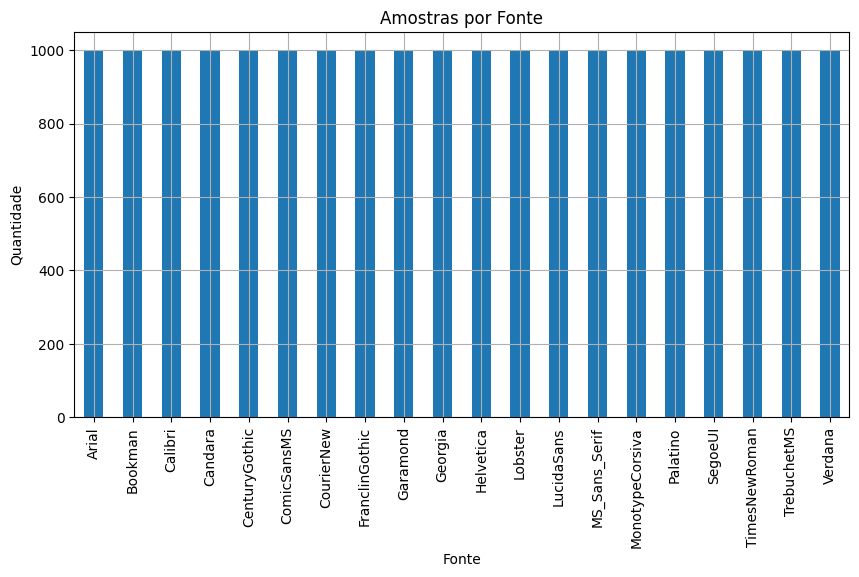

In [16]:
contagem_por_fonte.plot(kind='bar', title="Amostras por Fonte", figsize=(10, 5))
plt.xlabel("Fonte")
plt.ylabel("Quantidade")
plt.grid(True)
plt.show()


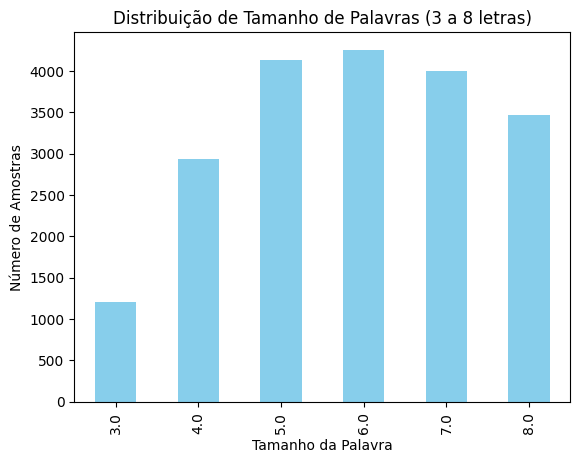

In [17]:
dist_tamanhos.plot(kind='bar', color='skyblue', title="Distribuição de Tamanho de Palavras (3 a 8 letras)")
plt.xlabel("Tamanho da Palavra")
plt.ylabel("Número de Amostras")
plt.show()

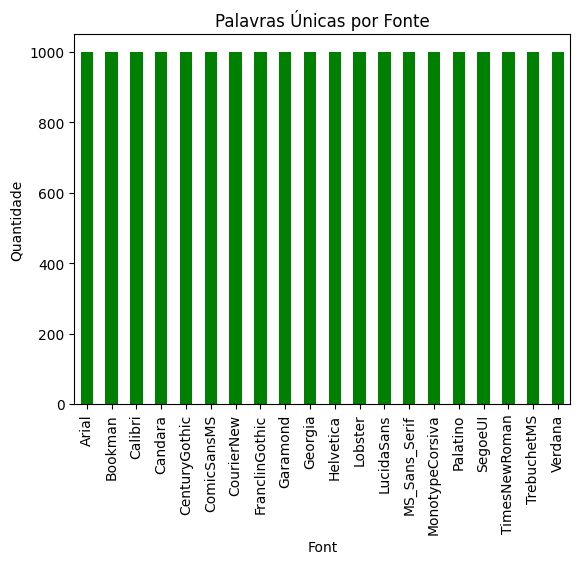

In [18]:
palavras_por_fonte.plot(kind='bar', color='green', title="Palavras Únicas por Fonte")
plt.ylabel("Quantidade")
plt.show()


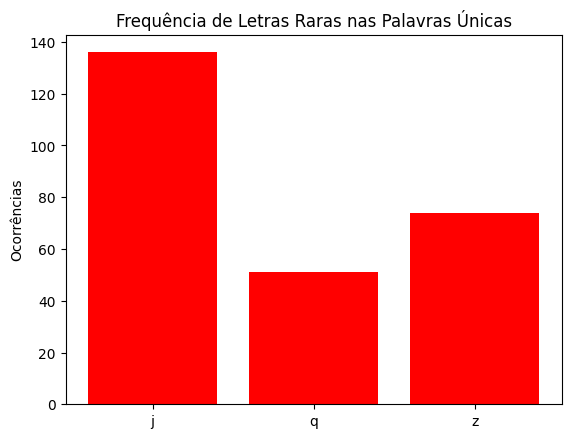

In [19]:
plt.bar(['j', 'q', 'z'], [cont_j, cont_q, cont_z], color='red')
plt.title("Frequência de Letras Raras nas Palavras Únicas")
plt.ylabel("Ocorrências")
plt.show()
